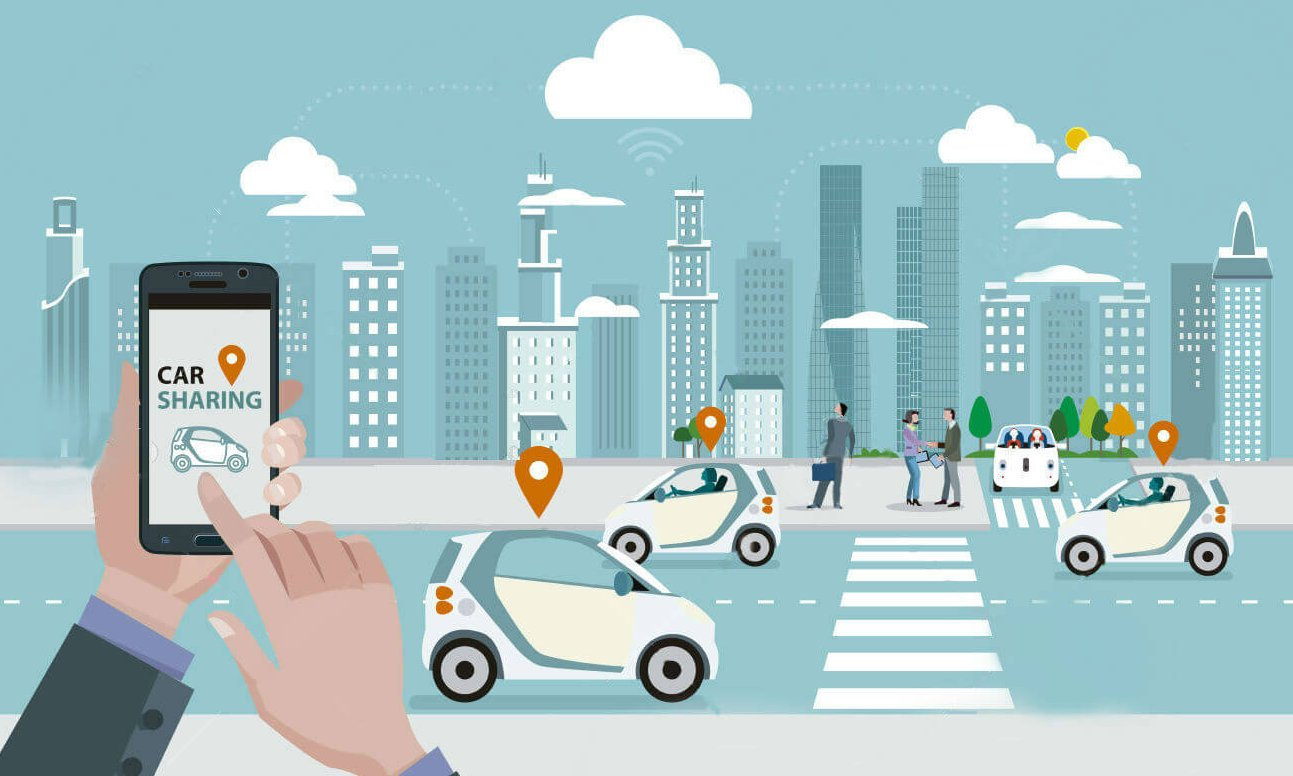

In [1]:
from IPython.display import Image
Image(filename = 'pyber_stock_image.jpg', width = 1500, height = 1500)

<center><h1>PyBer Ride Sharing - Homework 5 - Matplotlib</h1></center>

#### Observations

* While the rural fares are considerably less frequent (125 total rural rides) than urban (1625) or suburban (625) fares, the average amount per rural ride (\\$34.64) is greater than suburban (\\$30.74) and urban (\\$24.50).
* With 6.8\% total fares and only 2.6\% of total drivers, the rural market seems to be more lucrative for drivers than the suburban or urban markets.

<center><h2>Environment Setup</h2></center>

#### Dependencies

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#### Data Import

In [3]:
city = pd.read_csv('city_data.csv')
ride = pd.read_csv('ride_data.csv')

data = pd.merge(ride, city, how='left', on='city')
data = data.astype({'type': 'category'})

#### Data Preview

In [4]:
data.sample(20)

,city,date,fare,ride_id,driver_count,type
112,Port Samanthamouth,2018-02-03 07:07:01,18.03,9292190648631,57,Urban
1251,North Madeline,2018-05-03 00:07:06,16.44,212158091636,19,Urban
2039,South Teresa,2018-04-25 11:50:39,38.81,8758071332545,21,Suburban
656,Barajasview,2018-03-15 22:44:08,28.30,1314271514395,26,Urban
1395,East Kaylahaven,2018-04-30 08:22:19,37.41,1759788940587,65,Urban
1908,Port Shane,2018-04-24 10:06:18,45.92,5388908913857,7,Suburban
1646,Barronchester,2018-05-05 04:03:11,30.38,2281522828169,11,Suburban
1051,New Kimberlyborough,2018-01-27 14:49:59,23.09,5575542360660,33,Urban
434,Lake Scottton,2018-01-18 02:32:38,31.92,5706292854110,58,Urban
2264,South Marychester,2018-01-02 11:18:32,52.12,3454018971635,1,Rural


<center><h2>Bubble Plot of Ride Sharing Data</h2><center>

#### Set Global Plot Parameters

In [5]:
plt.rcParams.update({'font.size': 16})

plt.rcParams['axes.axisbelow'] = True

#### Build Plot DataFrame(s)

In [6]:
plot_values = data.groupby(['type', 'city']).agg({
    'fare': 'mean', 
    'city': 'count',
    'driver_count': 'sum'}
)

plot_values = plot_values.rename(
    columns={'city': '# of Rides'}
)
plot_values = plot_values.reset_index()

rural = plot_values[plot_values['type'] == 'Rural']
urban = plot_values[plot_values['type'] == 'Urban']
suburban = plot_values[plot_values['type'] == 'Suburban']

#### Construct Plot

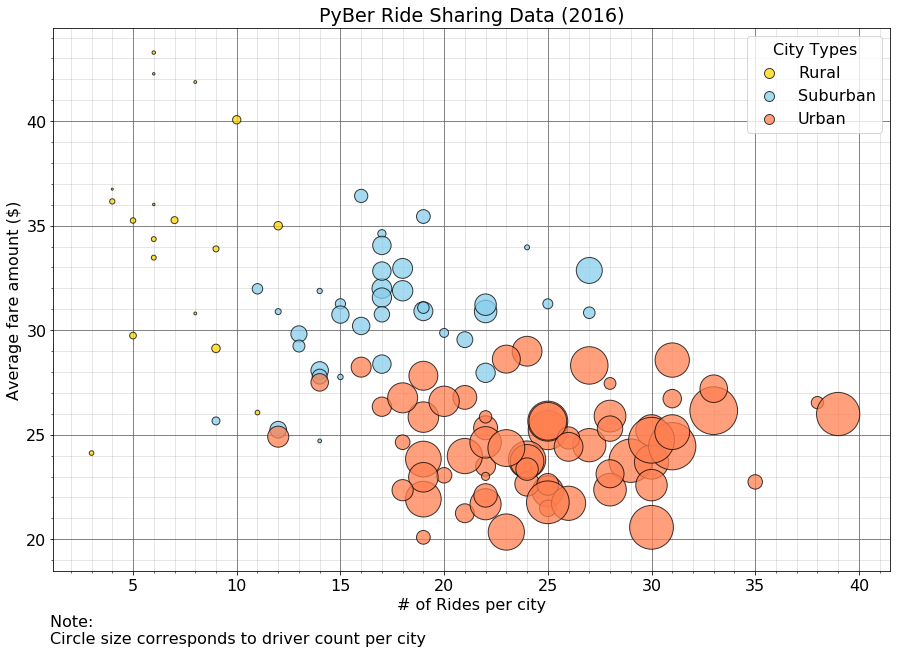

In [7]:
fig, ax = plt.subplots(1, figsize = [15, 10])

ax.scatter(
    rural['# of Rides'],
    rural['fare'],
    c = 'gold',
    s = rural['driver_count'],
    alpha = 0.75,
    edgecolors = 'black',
    linewidths = 1,
    label = 'Rural'
)

ax.scatter(
    suburban['# of Rides'],
    suburban['fare'],
    c = 'skyblue',
    s = suburban['driver_count'],
    alpha = 0.75,
    edgecolors = 'black',
    linewidths = 1,
    label = 'Suburban'
)

ax.scatter(
    urban['# of Rides'],
    urban['fare'],
    c = 'coral',
    s = urban['driver_count'],
    alpha = 0.75,
    edgecolors = 'black',
    linewidths = 1,
    label = 'Urban'
)

lgnd = ax.legend(loc = 1, title = 'City Types')
lgnd.legendHandles[0]._sizes = [100]
lgnd.legendHandles[1]._sizes = [100]
lgnd.legendHandles[2]._sizes = [100]

ax.set_ylabel('Average fare amount ($)')
ax.set_xlabel('# of Rides per city')
ax.set_title('PyBer Ride Sharing Data (2016)')

plt.text(1, 15, 'Note: \nCircle size corresponds to driver count per city')

plt.grid(b = True, which = 'major', color = '#666666', linestyle = '-')
plt.minorticks_on()
plt.grid(b = True, which = 'minor', color = '#666666', linestyle = '-', alpha = 0.2)

plt.axis('auto')
plt.savefig('Pyber Ride Sharing.png')

plt.show()

<center><h2>% of Total Fares by City Type</h2></center)



#### Build Plot DataFrame

In [8]:
fare_perc = data.groupby('type').agg({'fare': 'sum'})

total_fares = round(fare_perc.iloc[0, 0] + fare_perc.iloc[1, 0] + fare_perc.iloc[2, 0], 2)
rural_fares = round(fare_perc.iloc[0, 0], 2)
suburban_fares = round(fare_perc.iloc[1, 0])
urban_fares = round(fare_perc.iloc[2, 0])

rural_perc = round(rural_fares / total_fares, 3)
suburban_perc = round(suburban_fares / total_fares, 3)
urban_perc = round(urban_fares / total_fares, 3)

total_fares_dict = {
    'Urban': urban_perc,
    'Rural': rural_perc,
    'Suburban': suburban_perc
}

city_fares = pd.DataFrame(total_fares_dict, index=['Percentages'])

city_fares = pd.melt(city_fares).rename(
    columns={'variable': 'Type', 
             'value': 'Percentages'
            })

In [9]:
data.groupby('type').agg({'fare': 'count'})

,fare
type,
Rural,125
Suburban,625
Urban,1625


In [10]:
data.groupby('type').agg({'fare': 'mean'})

,fare
type,
Rural,34.623440
Suburban,30.970128
Urban,24.525772


#### Construct Plot

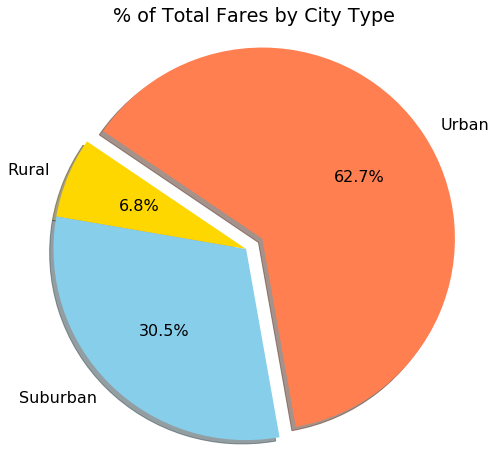

In [11]:
colors = ['coral', 'gold', 'skyblue']
explode = [0.1, 0.0, 0.0]

plt.figure(figsize = [8, 8])

plt.pie(
    city_fares['Percentages'], 
    labels = city_fares['Type'], 
    explode = explode, 
    colors = colors, 
    autopct = '%1.1f%%', 
    shadow = True, 
    startangle = 280
)

plt.title('% of Total Fares by City Type')
plt.axis('auto')

plt.savefig('% of Total Fares by City Type.png')

plt.show()

<center><h2>% of Total Rides by City Type</h2></center>

#### Build Plot DataFrame

In [12]:
rides_type = data.groupby('type').agg({'fare': 'count'})

total_rides = rides_type.iloc[0, 0] + rides_type.iloc[1, 0] + rides_type.iloc[2, 0]
rural_rides = rides_type.iloc[0, 0]
suburban_rides = rides_type.iloc[1, 0]
urban_rides = rides_type.iloc[2, 0]

urban_perc = round(urban_rides / total_rides, 3)
rural_perc = round(rural_rides / total_rides, 3)
suburban_perc = round(suburban_rides / total_rides, 3)

city_fares_dict = {
    'Urban': urban_perc,
    'Rural': rural_perc,
    'Suburban': suburban_perc
}

city_fares = pd.DataFrame(city_fares_dict, index=['Percentages'])
city_fares = pd.melt(city_fares).rename(columns={'variable': 'Type', 'value': 'Percentages'})

#### Construct Plot

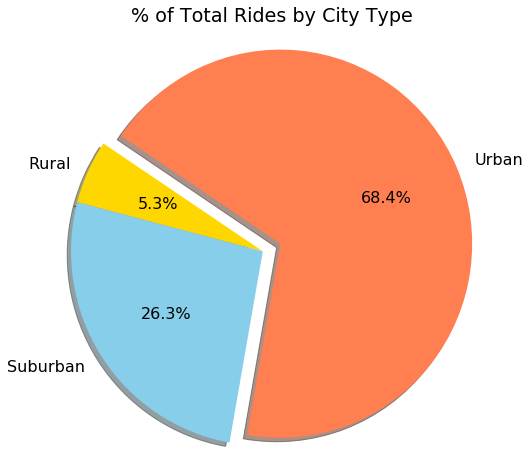

In [13]:
colors = ['coral', 'gold', 'skyblue']
explode = [0.1, 0, 0]

plt.figure(figsize = [8, 8])

plt.pie(
    city_fares['Percentages'], 
    labels = city_fares['Type'],
    explode = explode,  
    colors = colors, 
    autopct = '%1.1f%%', 
    shadow = True, 
    startangle = 260
)
plt.title('% of Total Rides by City Type')
plt.axis('auto')

plt.savefig('% of Total Rides by City Type')

plt.show()

<center><h2>% of Total Drivers by City Type</h2></center>

#### Build Plot DataFrame

In [14]:
drivers_count = city.groupby('type').agg({'driver_count': 'sum'})

total_drivers = drivers_count.iloc[0, 0] + drivers_count.iloc[1, 0] + drivers_count.iloc[2, 0]
rural_drivers = drivers_count.iloc[0, 0]
suburban_drivers = drivers_count.iloc[1, 0]
urban_drivers = drivers_count.iloc[2, 0]

rural_driver_perc = round(rural_drivers / total_drivers, 3)
suburban_driver_perc = round(suburban_drivers / total_drivers, 3)
urban_driver_perc = round(urban_drivers / total_drivers, 3)

drivers_dict = {
    'Urban': urban_driver_perc,
    'Rural': rural_driver_perc,
    'Suburban': suburban_driver_perc
}

city_drivers = pd.DataFrame(drivers_dict, index = ['Percentages'])
city_drivers = pd.melt(city_drivers).rename(columns = {'variable': 'Type', 'value': 'Percentages'})

#### Construct Plot

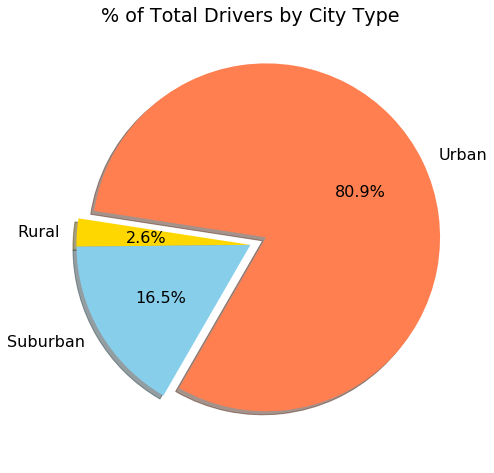

In [15]:
colors = ['coral', 'gold', 'skyblue']
explode = [0.1, 0, 0]

plt.figure(figsize = [8, 8])

plt.pie(
    city_drivers['Percentages'], 
    labels = city_drivers['Type'],
    explode = explode,  
    colors = colors, 
    autopct = '%1.1f%%', 
    shadow = True, 
    startangle = 240
)

plt.title('% of Total Drivers by City Type')
plt.savefig('% of Total Drivers by City Type')

plt.show()